# Bounding box detection - Racoon data


## Data files
- images_racoon.rar: contain images of racoons
- train_labels.cv: contains coordinates for bounding box for every image

### Import the necessary libraries

In [0]:
import os
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### 1. Install TensorFlow Object Detection API
- Please make sure you have installed tensorflow or tensorflow-gpu already. 
- For latest install instructions, check the [github](https://github.com/tensorflow/models/tree/master/research/object_detection) page or [readthedocs](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html) site for this API.

In [3]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 33720 (delta 0), reused 1 (delta 0), pack-reused 33715
Receiving objects: 100% (33720/33720), 511.98 MiB | 32.72 MiB/s, done.
Resolving deltas: 100% (21577/21577), done.
Checking out files: 100% (3194/3194), done.


In [4]:
#Verify that models folder exist
!ls -l

total 12
drwx------ 4 root root 4096 Jan 16 06:10 drive
drwxr-xr-x 7 root root 4096 Jan 16 06:11 models
drwxr-xr-x 1 root root 4096 Jan 13 16:38 sample_data


In [5]:
#Multiple folders including object_detection should exist in models/research folder
!ls -l models/research/

total 280
drwxr-xr-x  2 root root 4096 Jan 16 06:11 a3c_blogpost
drwxr-xr-x  2 root root 4096 Jan 16 06:11 adversarial_crypto
drwxr-xr-x  4 root root 4096 Jan 16 06:11 adversarial_logit_pairing
drwxr-xr-x  3 root root 4096 Jan 16 06:11 adversarial_text
drwxr-xr-x  2 root root 4096 Jan 16 06:11 adv_imagenet_models
drwxr-xr-x  2 root root 4096 Jan 16 06:11 astronet
drwxr-xr-x  3 root root 4096 Jan 16 06:11 attention_ocr
drwxr-xr-x  4 root root 4096 Jan 16 06:11 audioset
drwxr-xr-x  2 root root 4096 Jan 16 06:11 autoaugment
drwxr-xr-x  3 root root 4096 Jan 16 06:11 autoencoder
drwxr-xr-x  4 root root 4096 Jan 16 06:11 brain_coder
drwxr-xr-x 11 root root 4096 Jan 16 06:11 cognitive_mapping_and_planning
drwxr-xr-x  4 root root 4096 Jan 16 06:11 cognitive_planning
drwxr-xr-x  4 root root 4096 Jan 16 06:11 compression
drwxr-xr-x  7 root root 4096 Jan 16 06:11 cvt_text
drwxr-xr-x  3 root root 4096 Jan 16 06:11 deep_contextual_bandits
drwxr-xr-x  9 root root 4096 Jan 16 06:11 deeplab
drwxr-xr-x

In [6]:
#Install other dependencies including protobuf compiler
!apt-get -qq install protobuf-compiler python-pil python-lxml python-tk
!pip install --user Cython  --quiet
!pip install --user contextlib2 --quiet
!pip install --user jupyter --quiet
!pip install --user matplotlib --quiet

Selecting previously unselected package python-bs4.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

Protobuf compilation
- Convert .pb files to python code in object detection folder

In [7]:
#Move to models/research folder
%cd models/research

#Convert protobuf files to Python code using Protobuf compiler installed in previous step
!protoc object_detection/protos/*.proto --python_out=.
!ls -l object_detection/protos

/content/models/research
total 724
-rw-r--r-- 1 root root   6848 Jan 16 06:15 anchor_generator_pb2.py
-rw-r--r-- 1 root root    747 Jan 16 06:11 anchor_generator.proto
-rw-r--r-- 1 root root   4359 Jan 16 06:15 argmax_matcher_pb2.py
-rw-r--r-- 1 root root   1151 Jan 16 06:11 argmax_matcher.proto
-rw-r--r-- 1 root root   2175 Jan 16 06:15 bipartite_matcher_pb2.py
-rw-r--r-- 1 root root    350 Jan 16 06:11 bipartite_matcher.proto
-rw-r--r-- 1 root root   6208 Jan 16 06:15 box_coder_pb2.py
-rw-r--r-- 1 root root    656 Jan 16 06:11 box_coder.proto
-rw-r--r-- 1 root root  35788 Jan 16 06:15 box_predictor_pb2.py
-rw-r--r-- 1 root root   7366 Jan 16 06:11 box_predictor.proto
-rw-r--r-- 1 root root  24908 Jan 16 06:15 calibration_pb2.py
-rw-r--r-- 1 root root   2876 Jan 16 06:11 calibration.proto
-rw-r--r-- 1 root root  13553 Jan 16 06:15 eval_pb2.py
-rw-r--r-- 1 root root   3923 Jan 16 06:11 eval.proto
-rw-r--r-- 1 root root   3445 Jan 16 06:15 faster_rcnn_box_coder_pb2.py
-rw-r--r-- 1 root 

In [8]:
#Setup environment variable
#Change path to models/research and models/research/slim folders based on where you have cloned github repository above
%set_env PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim

env: PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim


In [9]:
#To be run from models/research folder
!python object_detection/builders/model_builder_test.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_

### Change directory

In [0]:
os.chdir('/content/drive/My Drive/Residency_10/Lab_Internal')

### Load the training data from train.csv file

In [0]:
train_data = pd.read_csv('train_labels.csv')

### Print the shape of the train dataset

In [12]:
train_data.shape

(173, 8)

In [13]:
train_data.head(10)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-17.jpg,259,194,raccoon,95,60,167,118
1,raccoon-11.jpg,660,432,raccoon,3,1,461,431
2,raccoon-63.jpg,600,400,raccoon,74,107,280,290
3,raccoon-63.jpg,600,400,raccoon,227,93,403,298
4,raccoon-60.jpg,273,185,raccoon,58,33,197,127
5,raccoon-69.jpg,205,246,raccoon,12,11,188,240
6,raccoon-180.jpg,600,400,raccoon,119,21,368,399
7,raccoon-200.jpg,261,193,raccoon,107,10,249,166
8,raccoon-141.jpg,249,202,raccoon,1,1,154,176
9,raccoon-19.jpg,259,194,raccoon,87,8,182,89


### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [0]:
IMAGE_SIZE = 128

### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [0]:
import csv
with open('train_labels.csv','r') as csvfile:
    paths = []
    coords = np.zeros((sum(1 for line in csvfile) - 1, 4))
    spamreader = csv.reader(csvfile, delimiter=',')
    csvfile.seek(0)
    next(spamreader, None)
    for i,row in enumerate(spamreader):
        #print(row)
        for j, r in enumerate(row): # Parse row with seven entities
            #print(i)
            if((j!= 0) & (j!=3)):
                row[j] = int(r)
            
        #print(row)      
        path, width, height, class_, xmin, ymin, xmax, ymax = row
        paths.append(path)
        #print(i)
        coords[i,0] = xmin * IMAGE_SIZE / width
        coords[i,1] = ymin * IMAGE_SIZE / height
        coords[i,2] = xmax * IMAGE_SIZE / width # Normalize bounding box by image size
        coords[i,3] = ymax * IMAGE_SIZE / height

In [16]:
row

['raccoon-152.jpg', 275, 183, 'raccoon', 41, 60, 223, 155]

In [17]:
coords

array([[4.69498069e+01, 3.95876289e+01, 8.25328185e+01, 7.78556701e+01],
       [5.81818182e-01, 2.96296296e-01, 8.94060606e+01, 1.27703704e+02],
       [1.57866667e+01, 3.42400000e+01, 5.97333333e+01, 9.28000000e+01],
       [4.84266667e+01, 2.97600000e+01, 8.59733333e+01, 9.53600000e+01],
       [2.71941392e+01, 2.28324324e+01, 9.23663004e+01, 8.78702703e+01],
       [7.49268293e+00, 5.72357724e+00, 1.17385366e+02, 1.24878049e+02],
       [2.53866667e+01, 6.72000000e+00, 7.85066667e+01, 1.27680000e+02],
       [5.24750958e+01, 6.63212435e+00, 1.22114943e+02, 1.10093264e+02],
       [5.14056225e-01, 6.33663366e-01, 7.91646586e+01, 1.11524752e+02],
       [4.29961390e+01, 5.27835052e+00, 8.99459459e+01, 5.87216495e+01],
       [1.30957096e+01, 4.62650602e+00, 8.32211221e+01, 1.25686747e+02],
       [8.40154440e+00, 2.57319588e+01, 1.18115830e+02, 9.69896907e+01],
       [4.35200000e+00, 3.12320000e+01, 7.14240000e+01, 1.27744000e+02],
       [6.83333333e+00, 6.66666667e-01, 1.13833333e

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [18]:
from PIL import Image
from keras_applications import mobilenet
from keras.applications.mobilenet import preprocess_input
from keras.backend import epsilon
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import Reshape

Using TensorFlow backend.


In [19]:
!pip install patool
import patoolib
patoolib.extract_archive('images_racoon-1.rar')

     |████████████████████████████████| 81kB 3.4MB/s 
patool: Extracting images_racoon-1.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/Residency_10/Lab_Internal/images_racoon-1.rar"
patool:     with cwd='./Unpack_oto6kcwk'
patool: ... images_racoon-1.rar extracted to `images'.


'images'

In [0]:
batch_images = np.zeros(shape=(len(paths),IMAGE_SIZE,IMAGE_SIZE,3),dtype=np.float32)

In [0]:
for i,img_name in enumerate(paths):
  img=Image.open('/content/drive/My Drive/Residency_10/Lab_Internal/images/'+img_name)
  img=img.resize((IMAGE_SIZE,IMAGE_SIZE))
  img = img.convert("RGB")
  batch_images[i]=preprocess_input(np.array(img,dtype=np.float32))

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3. Freeze all the layers. Add convolution and reshape layers at the end to ensure the output is 4 coordinates

In [23]:
from keras.applications.mobilenet import MobileNet
IMG_SHAPE=(IMAGE_SIZE, IMAGE_SIZE, 3)
model = MobileNet(input_shape=IMG_SHAPE,include_top=False,alpha=1.0)












17227776/17225924 [==============================] - 1s 0us/step


In [0]:
for layers in model.layers:
  layers.trainable=False

In [0]:
X=model.layers[-1].output
X=Conv2D(4,kernel_size=4)(X)
X=Reshape((4,))(X)

In [26]:
model=Model(inputs=model.input, output=X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("re...)`
  """Entry point for launching an IPython kernel.


### Define a custom loss function IoU which calculates Intersection Over Union

In [0]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [28]:
import tensorflow as tf
model.compile(optimizer='adam',loss='mse',metrics=[IoU])


Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [29]:
model.fit(batch_images,coords,epochs=30,batch_size=32,verbose=1)



Epoch 1/30
173/173 [==============================] - 6s 34ms/step - loss: 4333.8767 - IoU: 0.0542
Epoch 2/30
173/173 [==============================] - 5s 29ms/step - loss: 1013.9434 - IoU: 0.3619
Epoch 3/30
173/173 [==============================] - 5s 29ms/step - loss: 421.1313 - IoU: 0.5707
Epoch 4/30
173/173 [==============================] - 5s 29ms/step - loss: 619.8392 - IoU: 0.5468
Epoch 5/30
173/173 [==============================] - 5s 29ms/step - loss: 440.3158 - IoU: 0.5693
Epoch 6/30
173/173 [==============================] - 5s 29ms/step - loss: 235.5991 - IoU: 0.6414
Epoch 7/30
173/173 [==============================] - 5s 29ms/step - loss: 209.8047 - IoU: 0.6357
Epoch 8/30
173/173 [==============================] - 5s 30ms/step - loss: 192.9059 - IoU: 0.6640
Epoch 9/30
173/173 [==============================] - 5s 30ms/step - loss: 155.4744 - IoU: 0.7060
Epoch 10/30
173/173 [==============================] - 5s 29ms/step - loss: 137.1486 - IoU: 0.7315
Epoch 11/30
173

### Pick a test image from the given data

In [31]:
# Pick a test image, run model, show image, and show predicted bounding box overlaid on the image
import cv2

#Pickup a random image number
img_num = np.random.randint(0, train_data.shape[0])

#Read the image
img_file = '/content/drive/My Drive/Residency_10/Lab_Internal/images/' +paths[img_num]

#image_name = 'images/raccoon-144.jpg'
unscaled = cv2.imread(img_file) # Original image for display
image_height, image_width, _ = unscaled.shape
print(image_height,image_width,)

768 1024


### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

In [0]:
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

### Predict the coordinates of the bounding box for the given test image

In [0]:
region = model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

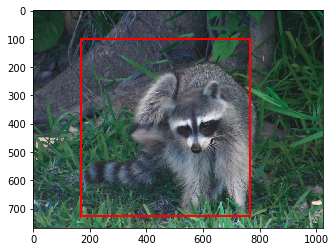

In [34]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[3]) * image_height / IMAGE_SIZE)


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()